 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Expand display screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Display all the results
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv", )
whale_ret = pd.read_csv(whale_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
whale_ret.shape
whale_ret.dtypes
whale_ret.head()

(1060, 4)

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [3]:
# Count nulls
whale_ret.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_ret.dropna(inplace = True)
whale_ret.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv", )
algo_ret = pd.read_csv(algo_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
algo_ret.shape
algo_ret.dtypes
algo_ret.head()

(1241, 2)

Algo 1    float64
Algo 2    float64
dtype: object

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [6]:
# Count nulls
algo_ret.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_ret.dropna(inplace = True)
algo_ret.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/sp500_history.csv", )
sp500_prc = pd.read_csv(sp500_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
sp500_prc.shape
sp500_prc.head()

(1649, 1)

Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06

In [9]:
# Check Data Types
sp500_prc.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_prc['Close'] = sp500_prc['Close'].str.replace('$','')
# convert object to float
sp500_prc['Close'] = sp500_prc['Close'].astype('float')
sp500_prc.head()

<ipython-input-10-15e72a833767>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_prc['Close'] = sp500_prc['Close'].str.replace('$','')


Close
Date               
2019-04-23  2933.68
2019-04-22  2907.97
2019-04-18  2905.03
2019-04-17  2900.45
2019-04-16  2907.06

In [11]:
# Calculate Daily Returns
sp500_ret = sp500_prc.pct_change()
sp500_ret.head()

Close
Date                
2019-04-23       NaN
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279

In [12]:
# Drop nulls
sp500_ret.dropna(inplace = True)

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_ret = sp500_ret.rename(columns = {
    "Close": "sp500"
})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portf_ret = pd.concat([whale_ret, algo_ret, sp500_ret], axis = 'columns', join = 'inner')
# Sort the index in ascending order
portf_ret.sort_index(ascending = True, inplace = True)
portf_ret.head(10)

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
2015-03-10                  -0.010263           -0.005341   
2015-03-11                   0.004012            0.005163   
2015-03-12                   0.008265            0.010272   
2015-03-13                  -0.002497           -0.001428   
2015-03-16                   0.007901            0.003583   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
2015-03-10                    -0.012079               -0.009739 -0.001392   
2015-03-11                     0.003312               -0.001147  0.002994   
2015-03-12                     0.013117                0.010801 -0.002935   
2015-03-13                    -0.003697               -0.008142 -0.005423   
2015-03-16                     0.007953                0.008055 -0.003395   

              Algo 2     sp500  
Date                            
2015-03-03 -0.000949  0.004408  
2015-03-04  0.002416 -0.001195  
2015-03-05  0.004323  0.014378  
2015-03-06 -0.011460 -0.003929  
2015-03-09  0.001303  0.017254  
2015-03-10 -0.012155  0.001921  
2015-03-11  0.000605 -0.012445  
2015-03-12  0.011667  0.006112  
2015-03-13 -0.005062 -0.013353  
2015-03-16  0.004117  0.003331

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date', ylabel='Daily Returns'>

array([<AxesSubplot:xlabel='Date', ylabel='Daily Returns'>,
       <AxesSubplot:xlabel='Date', ylabel='Daily Returns'>,
       <AxesSubplot:xlabel='Date', ylabel='Daily Returns'>,
       <AxesSubplot:xlabel='Date', ylabel='Daily Returns'>,
       <AxesSubplot:xlabel='Date', ylabel='Daily Returns'>,
       <AxesSubplot:xlabel='Date', ylabel='Daily Returns'>,
       <AxesSubplot:xlabel='Date', ylabel='Daily Returns'>], dtype=object)

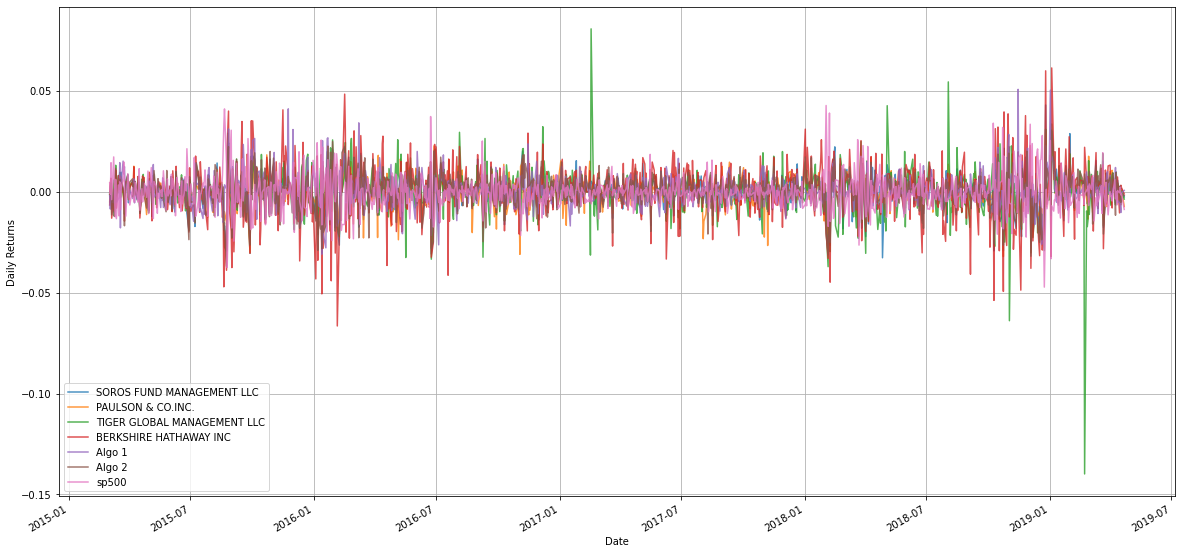

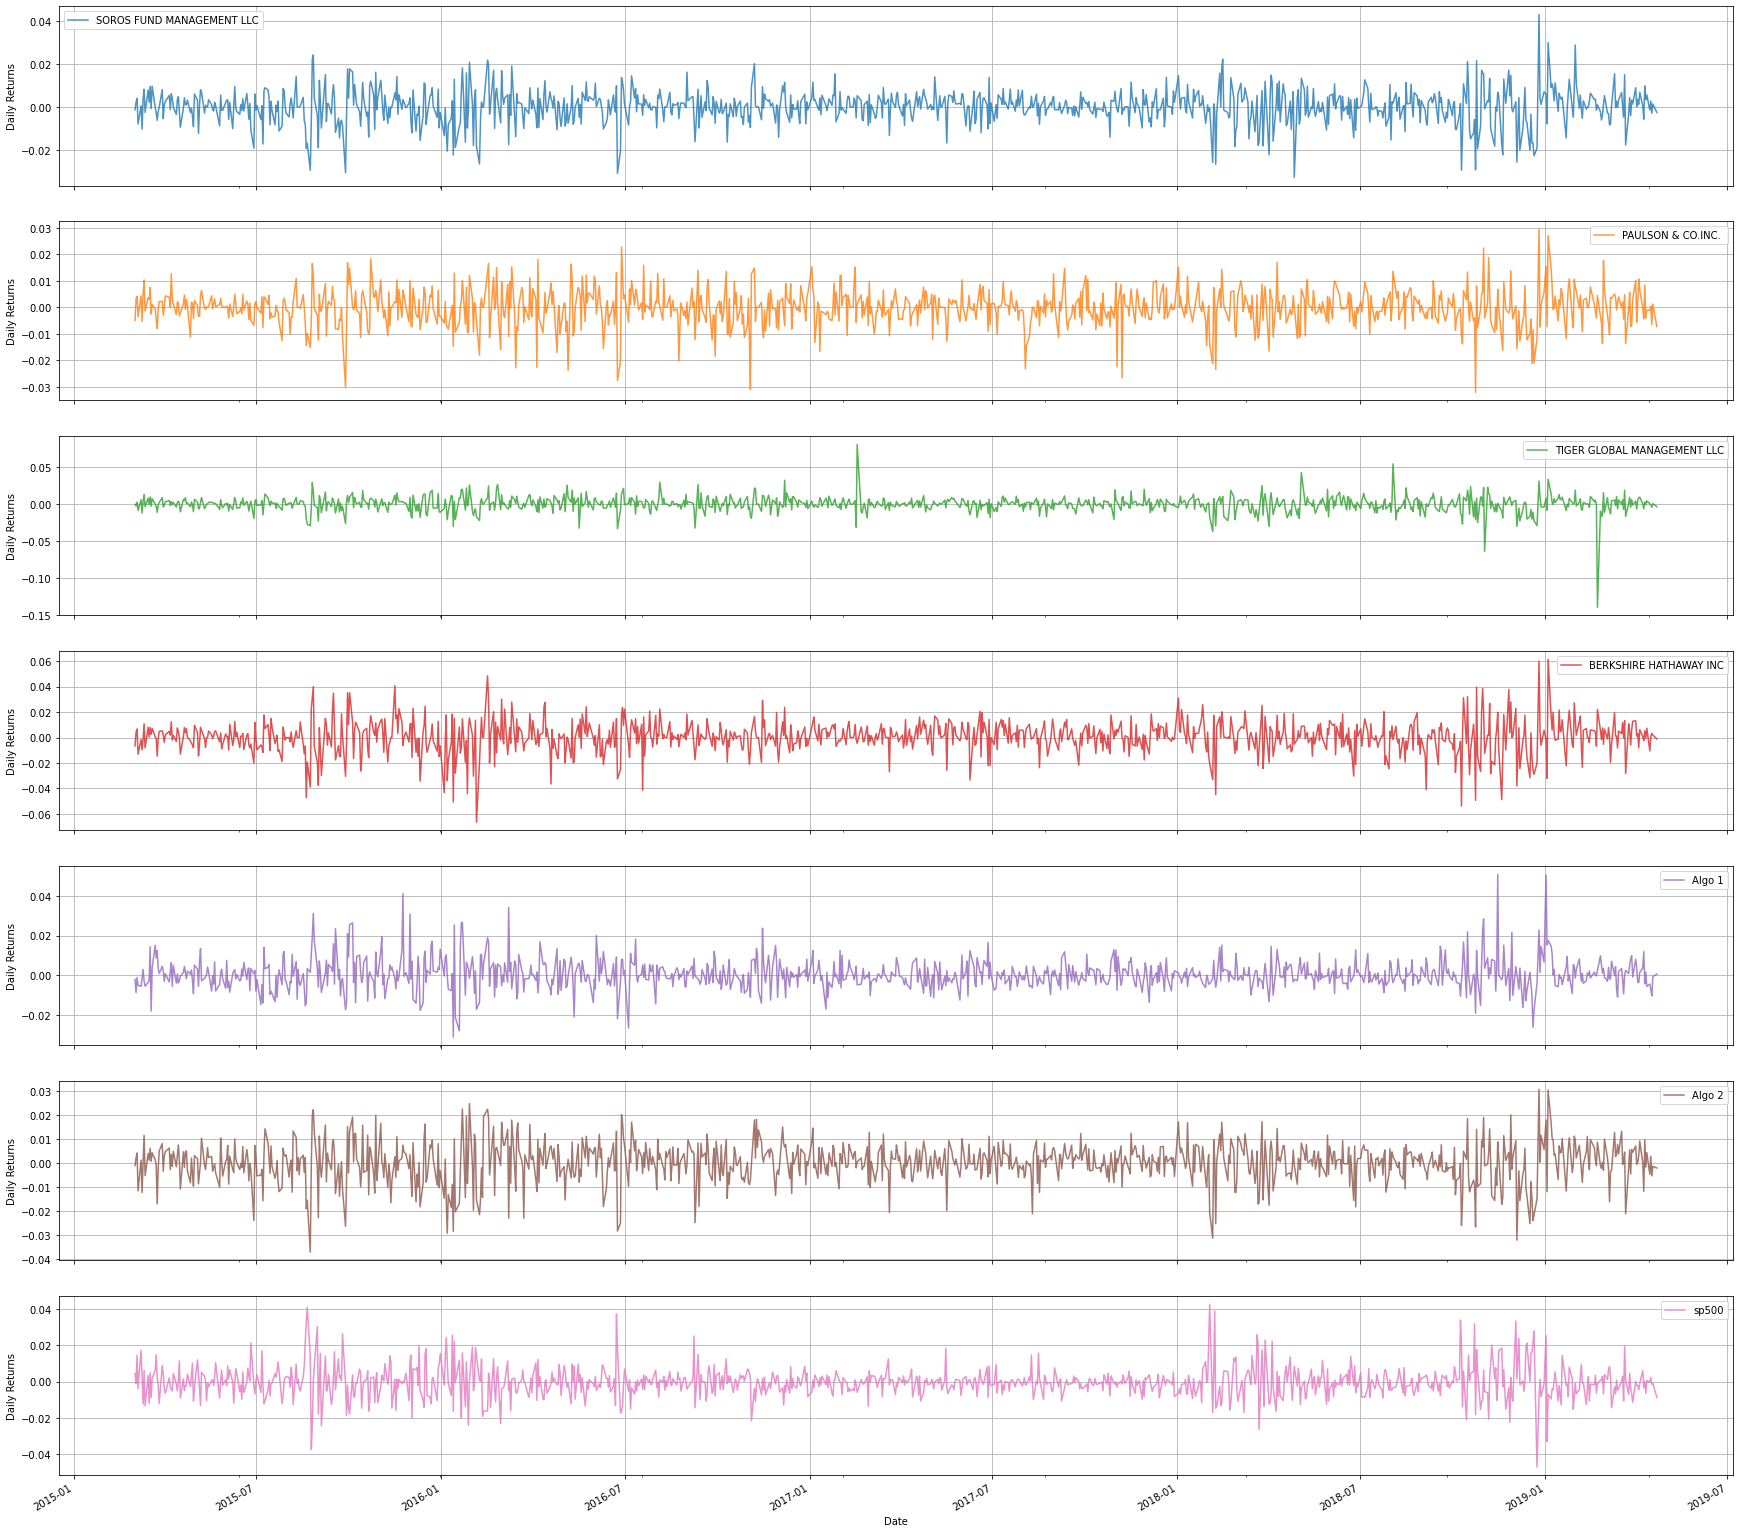

In [15]:
# Plot daily returns of all portfolios
## Plot them together
portf_ret.plot(figsize = (20,10), ylabel = 'Daily Returns',legend = True, grid = True, alpha = 0.8)
## Plot them separately
portf_ret.plot(subplots=True, figsize = (30,30), ylabel = 'Daily Returns',legend = True, grid = True, alpha = 0.8)

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date', ylabel='Cumulative Returns'>

array([<AxesSubplot:xlabel='Date', ylabel='Cumulative Returns'>,
       <AxesSubplot:xlabel='Date', ylabel='Cumulative Returns'>,
       <AxesSubplot:xlabel='Date', ylabel='Cumulative Returns'>,
       <AxesSubplot:xlabel='Date', ylabel='Cumulative Returns'>,
       <AxesSubplot:xlabel='Date', ylabel='Cumulative Returns'>,
       <AxesSubplot:xlabel='Date', ylabel='Cumulative Returns'>,
       <AxesSubplot:xlabel='Date', ylabel='Cumulative Returns'>],
      dtype=object)

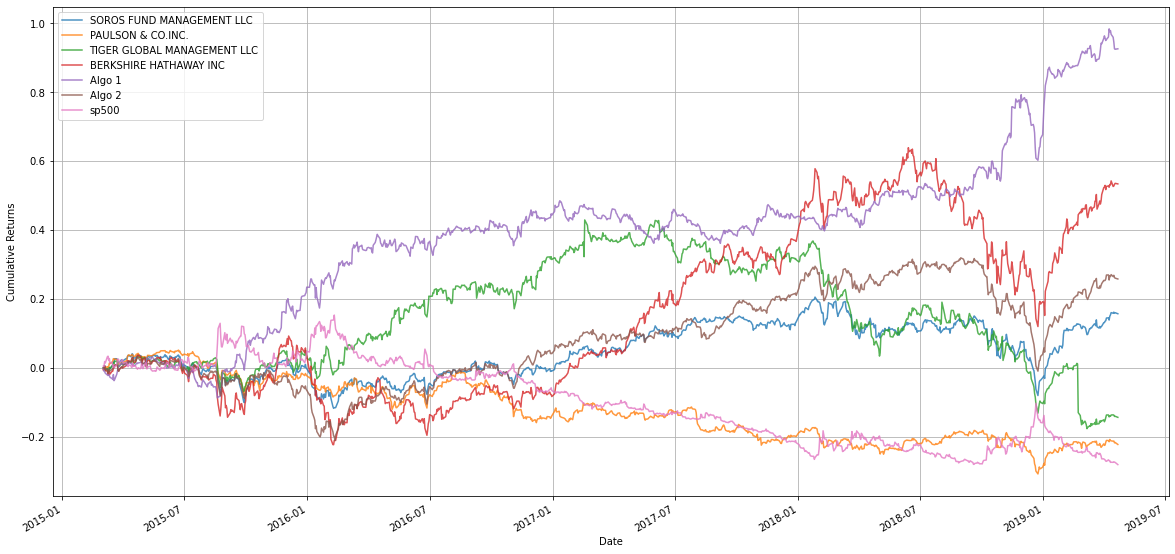

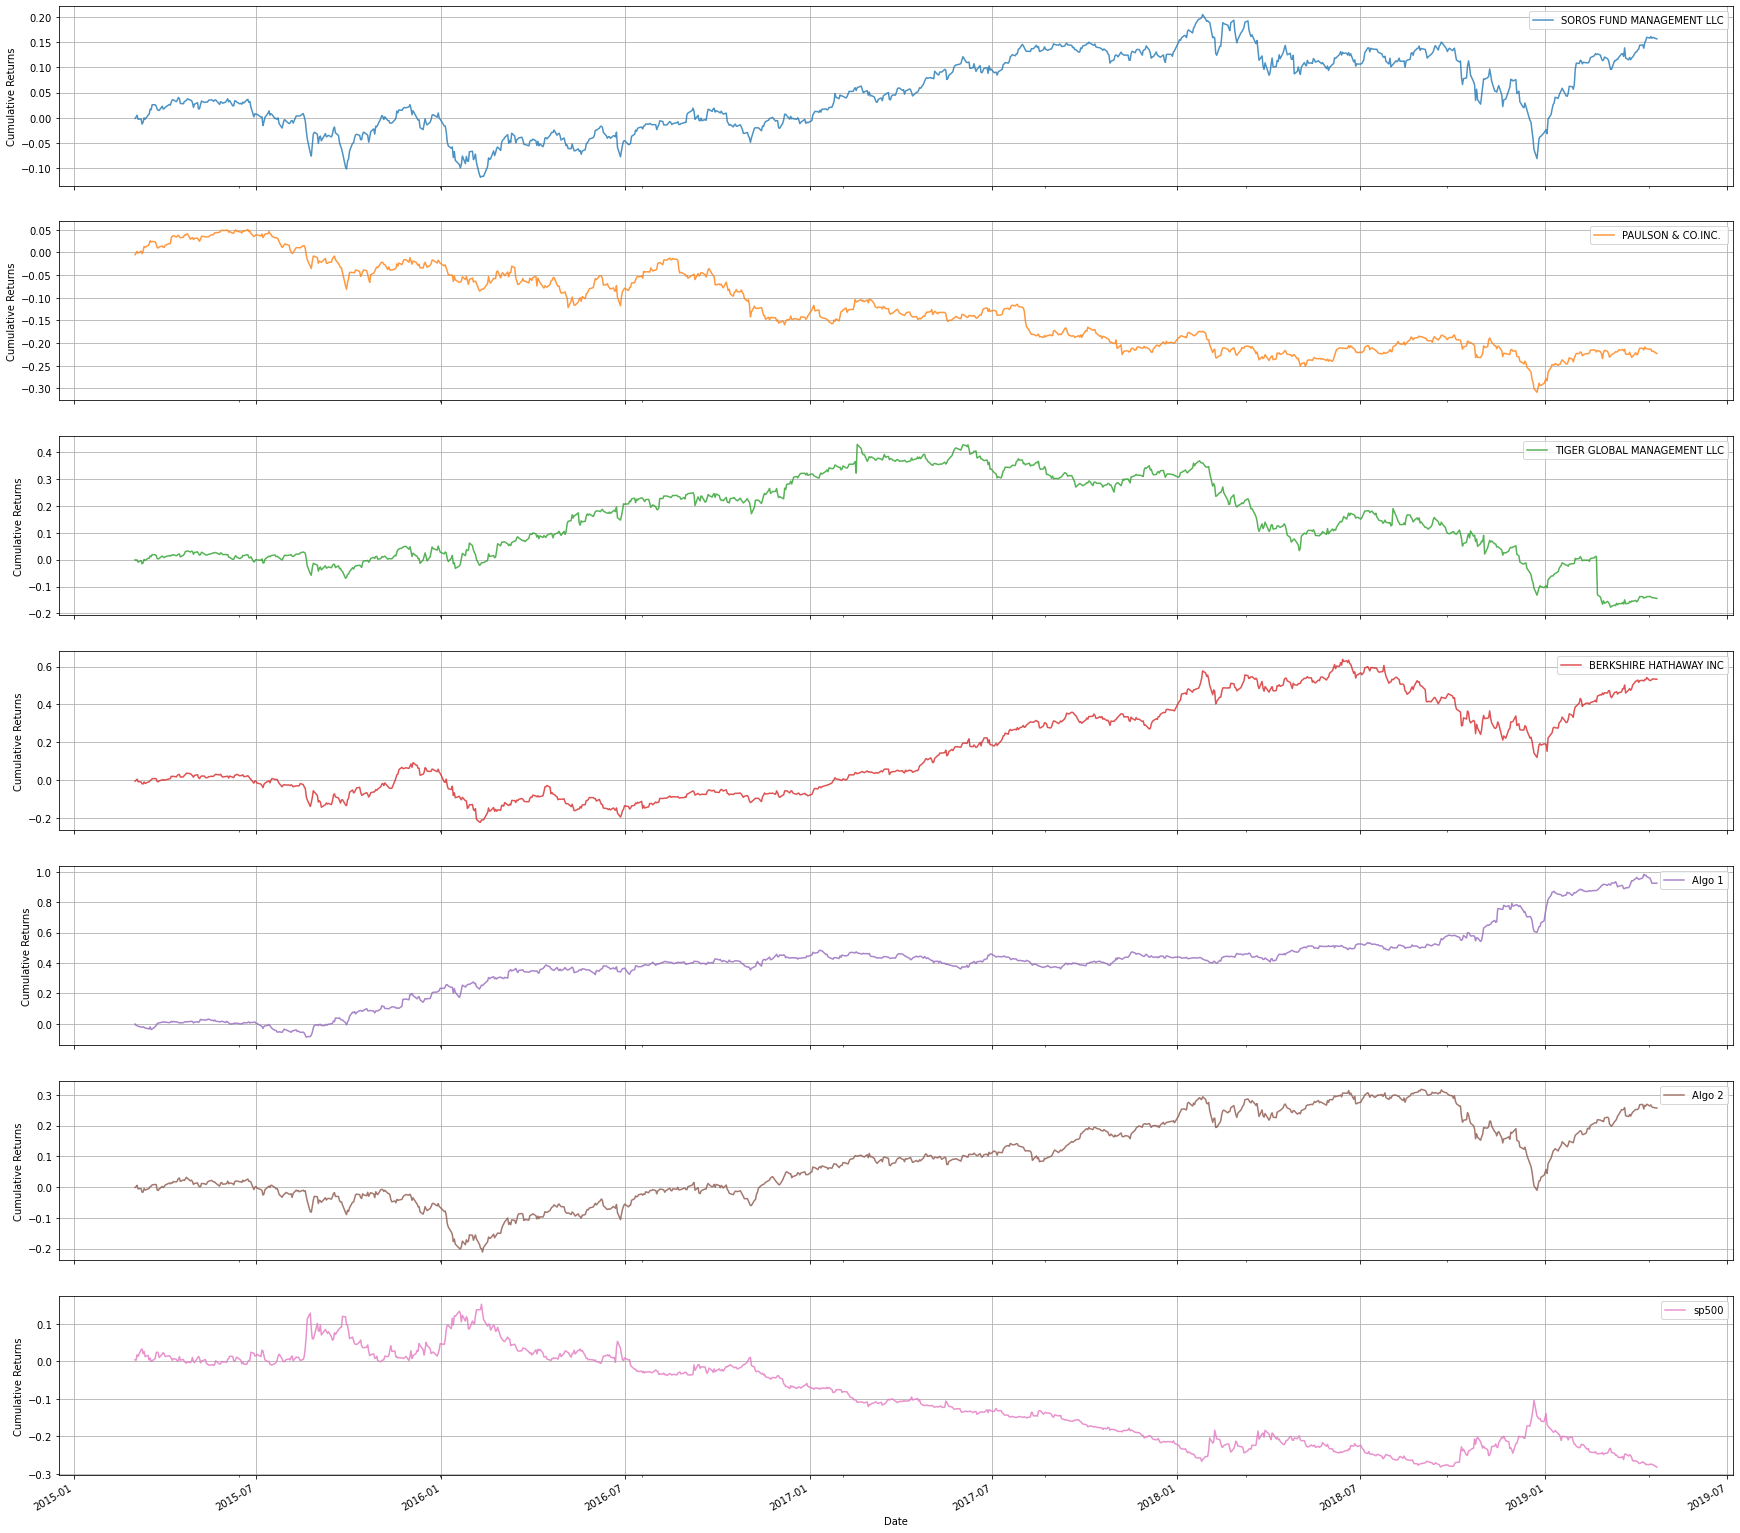

In [16]:
# Calculate cumulative returns of all portfolios
portf_cumret = (1 + portf_ret).cumprod() - 1
## Plot them together
portf_cumret.plot(figsize = (20,10), ylabel = 'Cumulative Returns',legend = True, grid = True, alpha = 0.8)
## Plot them separately
portf_cumret.plot(subplots=True, figsize = (30,30), ylabel = 'Cumulative Returns',legend = True, grid = True, alpha = 0.8)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

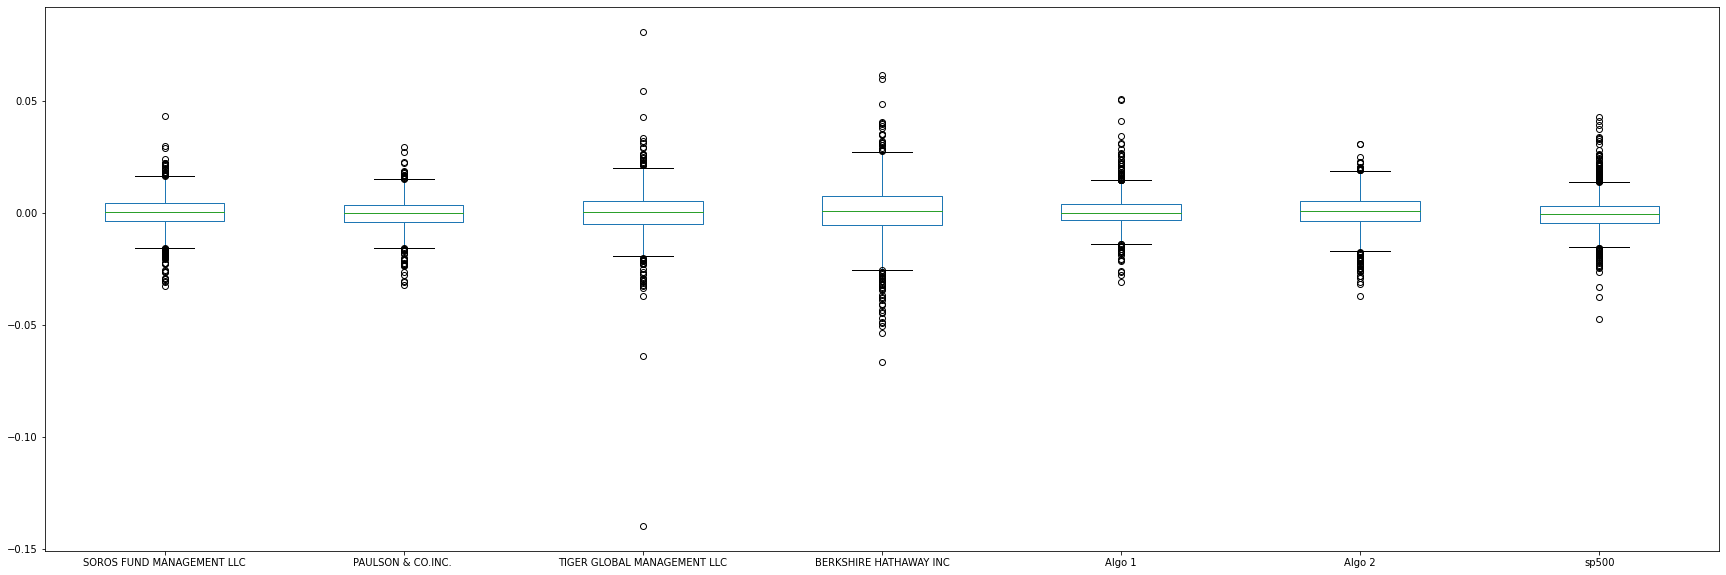

In [17]:
# Box plot to visually show risk
portf_ret.plot.box(figsize = (30,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
# Box plot to visually show risk
portf_daily_std = portf_ret.std()

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = portf_ret['sp500'].std()
sp500_daily_std

# Determine which portfolios are riskier than the S&P 500
portf_daily_std.sort_values(ascending = True)
print("The Portfolios riskier than the S&P 500 are TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC")

0.00858688974707399

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
sp500                          0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

The Portfolios riskier than the S&P 500 are TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
sp500_annual_std = sp500_daily_std * np.sqrt(252)
sp500_annual_std

0.1363126488377286

---

# Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date', ylabel='Standard Deviation'>

array([<AxesSubplot:xlabel='Date', ylabel='Standard Deviation'>,
       <AxesSubplot:xlabel='Date', ylabel='Standard Deviation'>,
       <AxesSubplot:xlabel='Date', ylabel='Standard Deviation'>,
       <AxesSubplot:xlabel='Date', ylabel='Standard Deviation'>,
       <AxesSubplot:xlabel='Date', ylabel='Standard Deviation'>,
       <AxesSubplot:xlabel='Date', ylabel='Standard Deviation'>,
       <AxesSubplot:xlabel='Date', ylabel='Standard Deviation'>],
      dtype=object)

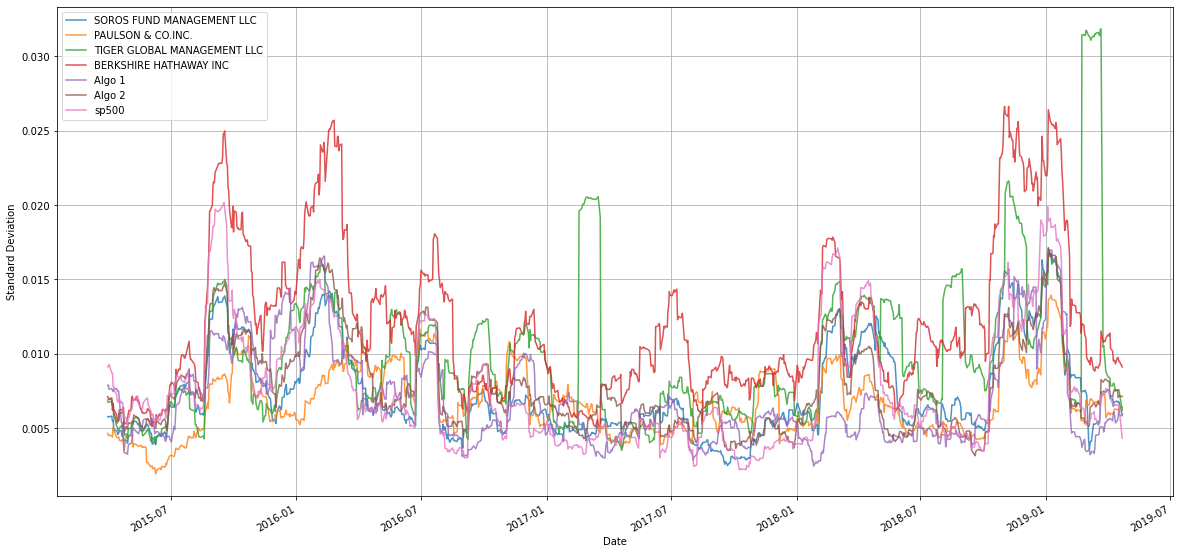

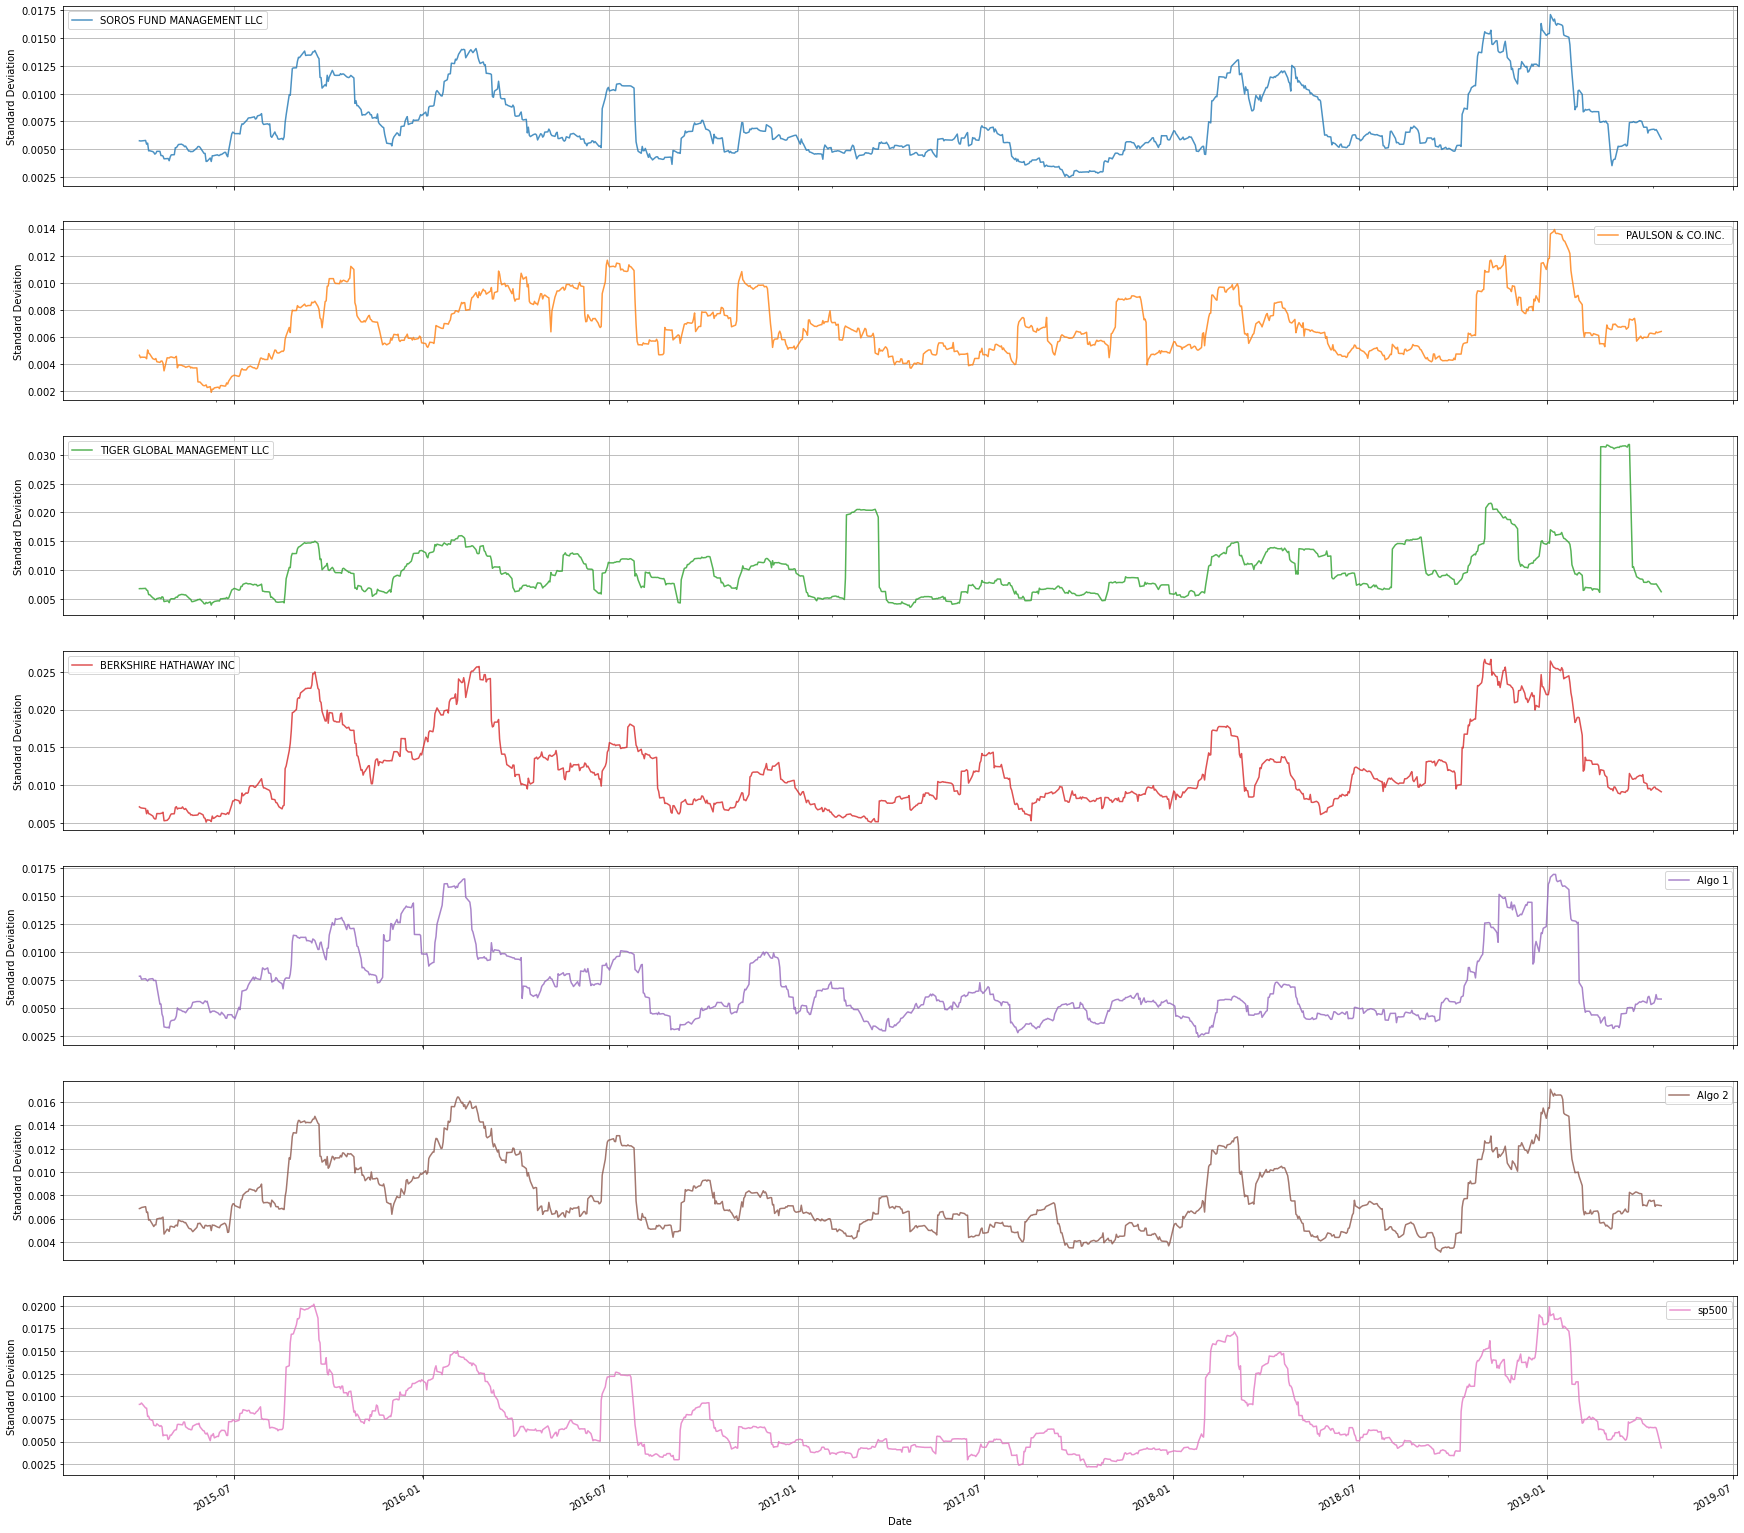

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portf_rolling_std = portf_ret.rolling(21).std()
# Plot the rolling standard deviation

## Plot all together
portf_rolling_std.plot(figsize = (20,10), ylabel = 'Standard Deviation',legend = True, grid = True, alpha = 0.8)

## Plot them separately
portf_rolling_std.plot(subplots=True, figsize = (30,30), ylabel = 'Standard Deviation',legend = True, grid = True, alpha = 0.8)

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
correlation = portf_ret.corr()

# Display de correlation matrix
correlation
print("PAULSON & CO.INC. mostly mimicks sp500 among all the portfolios because it has the largest positive correlation with sp500")

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699823   
PAULSON & CO.INC.                             0.699823            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561040            0.434308   
BERKSHIRE HATHAWAY INC                        0.754157            0.545451   
Algo 1                                        0.320901            0.268631   
Algo 2                                        0.826730            0.678085   
sp500                                         0.000574            0.013549   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561040   
PAULSON & CO.INC.                               0.434308   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424125   
Algo 1                                          0.164114   
Algo 2                                          0.507160   
sp500                                          -0.001505   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754157  0.320901  0.826730   
PAULSON & CO.INC.                          0.545451  0.268631  0.678085   
TIGER GLOBAL MANAGEMENT LLC                0.424125  0.164114  0.507160   
BERKSHIRE HATHAWAY INC                     1.000000  0.291678  0.687756   
Algo 1                                     0.291678  1.000000  0.287852   
Algo 2                                     0.687756  0.287852  1.000000   
sp500                                     -0.013856 -0.033963 -0.002192   

                                sp500  
SOROS FUND MANAGEMENT LLC    0.000574  
PAULSON & CO.INC.            0.013549  
TIGER GLOBAL MANAGEMENT LLC -0.001505  
BERKSHIRE HATHAWAY INC      -0.013856  
Algo 1                      -0.033963  
Algo 2                      -0.002192  
sp500                        1.000000

PAULSON & CO.INC. mostly mimicks sp500 among all the portfolios because it has the largest positive correlation with sp500


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of PAULSON & CO.INC. '}, xlabel='Date'>

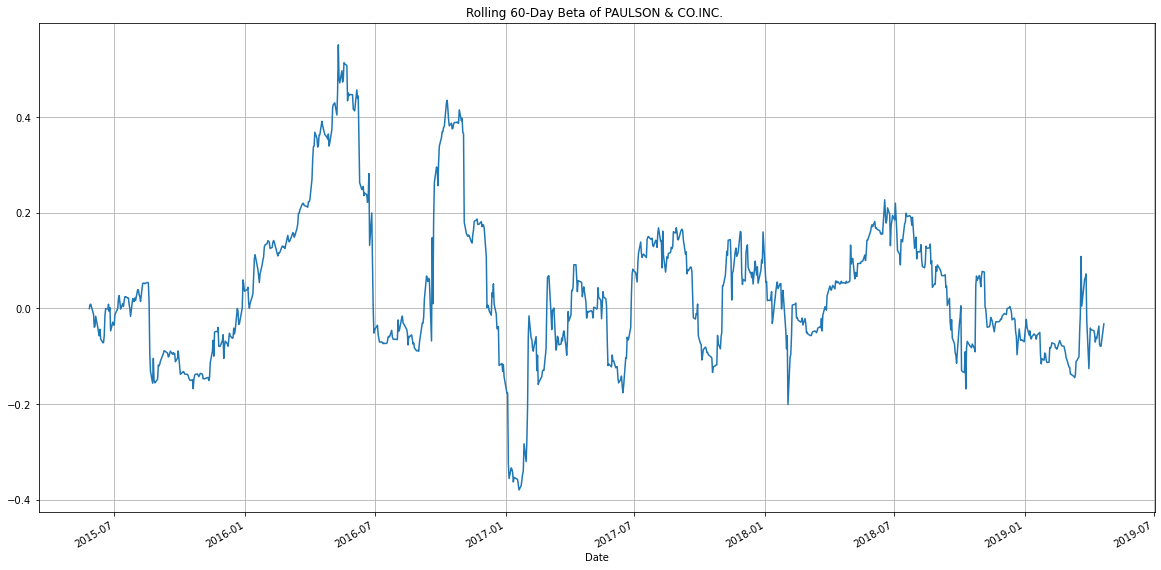

In [23]:
# Calculate covariance of a single portfolio
rolling_cov = portf_ret['PAULSON & CO.INC. '].rolling(window = 60).cov(portf_ret['sp500'])

# Calculate variance of S&P 500
rolling_var = portf_ret['sp500'].rolling(window = 60).var()

# Computing beta
rolling_beta = rolling_cov / rolling_var

# Plot beta trend
rolling_beta.plot(figsize = (20,10), grid = True, title = 'Rolling 60-Day Beta of PAULSON & CO.INC. ')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Expotential weighted 21-Day Half-Life Beta of PAULSON & CO.INC. '}, xlabel='Date'>

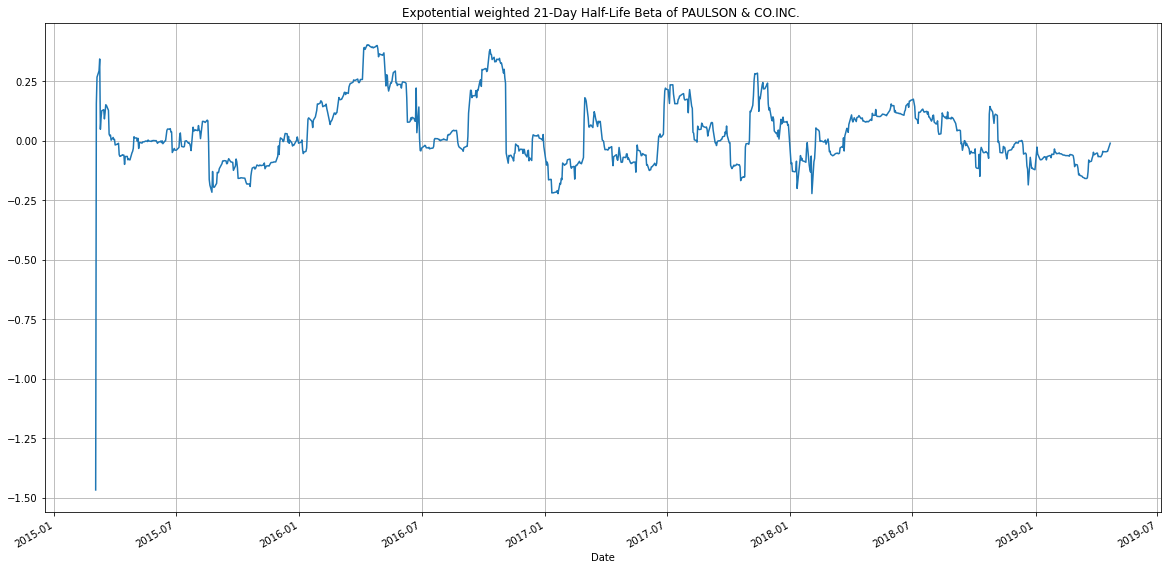

In [24]:
# Use `ewm` to calculate the rolling window
ewm_mean = portf_ret['PAULSON & CO.INC. '].ewm(halflife=21).mean()
ewm_cov = portf_ret['PAULSON & CO.INC. '].ewm(halflife=21).cov(portf_ret['sp500'])
ewm_var = portf_ret['sp500'].ewm(halflife=21).var()
ewm_beta = ewm_cov / ewm_var

ewm_beta.plot(figsize = (20,10), grid = True, title = 'Expotential weighted 21-Day Half-Life Beta of PAULSON & CO.INC. ')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# import risk-free rate first
risk_free_path = Path("Resources/risk_free_rate.csv")
risk_free = pd.read_csv(risk_free_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
risk_free.head()

rf_rate
Date                
1954-01-04  0.000148
1954-01-05  0.000142
1954-01-06  0.000142
1954-01-07  0.000146
1954-01-08  0.000146

In [26]:
# merge risk free rates with portfolio daily returns
portf_ret2 = pd.concat([portf_ret, risk_free], axis = 'columns', join = 'inner')

# sort date in ascending order
portf_ret2 = portf_ret2.sort_index(ascending = True)

# Annualized Sharpe Ratios
sharpe_ratios = ((portf_ret2.mean()-portf_ret2['rf_rate'].mean()) * 252) / (portf_ret2.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.190407
PAULSON & CO.INC.             -0.710552
TIGER GLOBAL MANAGEMENT LLC   -0.289643
BERKSHIRE HATHAWAY INC         0.506337
Algo 1                         1.138814
Algo 2                         0.297261
sp500                         -0.779208
rf_rate                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

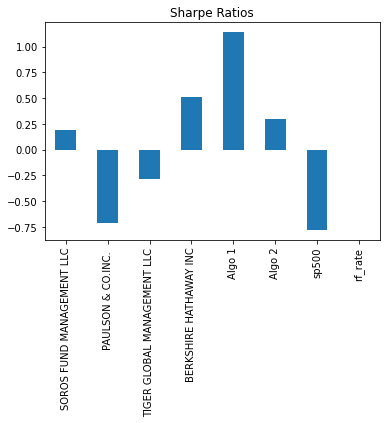

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = 'Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Answer: only Algorighmic Strategy 1 outperforms both the S&P 500 and the whales portfolios in terms of sharpe ratios. Algorighmic Strategy 2 outperforms S&P 500 but not BERKSHIRE HATHAWAY INC.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
goog_path = Path("Resources/goog_historical.csv")
goog = pd.read_csv(goog_path, index_col = 'Trade DATE', parse_dates = True, infer_datetime_format = True)
goog = goog.sort_index(ascending = True)
goog = goog.rename(columns = {
    'NOCP':'GOOG'
})
goog

Symbol     GOOG
Trade DATE                
2018-05-11   GOOG  1098.26
2018-05-14   GOOG  1100.20
2018-05-15   GOOG  1079.23
2018-05-16   GOOG  1081.77
2018-05-17   GOOG  1078.59
...           ...      ...
2019-05-03   GOOG  1185.40
2019-05-06   GOOG  1189.39
2019-05-07   GOOG  1174.10
2019-05-08   GOOG  1166.27
2019-05-09   GOOG  1162.38

[250 rows x 2 columns]

In [29]:
# Reading data from 2nd stock
aapl_path = Path("Resources/aapl_historical.csv")
aapl = pd.read_csv(aapl_path, index_col = 'Trade DATE', parse_dates = True, infer_datetime_format = True)
aapl = aapl.sort_index(ascending = True)
aapl = aapl.rename(columns = {
    'NOCP':'AAPL'
})
aapl

Symbol    AAPL
Trade DATE               
2018-05-11   AAPL  188.59
2018-05-14   AAPL  188.15
2018-05-15   AAPL  186.44
2018-05-16   AAPL  188.18
2018-05-17   AAPL  186.99
...           ...     ...
2019-05-03   AAPL  211.75
2019-05-06   AAPL  208.48
2019-05-07   AAPL  202.86
2019-05-08   AAPL  202.90
2019-05-09   AAPL  200.72

[250 rows x 2 columns]

In [30]:
# Reading data from 3rd stock
cost_path = Path("Resources/cost_historical.csv")
cost = pd.read_csv(cost_path, index_col = 'Trade DATE', parse_dates = True, infer_datetime_format = True)
cost = cost.sort_index(ascending = True)
cost = cost.rename(columns = {
    'NOCP':'COST'
})
cost

Symbol    COST
Trade DATE               
2018-05-11   COST  195.76
2018-05-14   COST  195.88
2018-05-15   COST  195.48
2018-05-16   COST  198.71
2018-05-17   COST  199.60
...           ...     ...
2019-05-03   COST  244.62
2019-05-06   COST  244.23
2019-05-07   COST  240.18
2019-05-08   COST  241.34
2019-05-09   COST  243.47

[250 rows x 2 columns]

In [31]:
# Combine all stocks in a single DataFrame
my_stock = pd.concat([goog, aapl, cost], axis = 'columns', join = 'inner')
my_stock.head()

Symbol     GOOG Symbol    AAPL Symbol    COST
Trade DATE                                              
2018-05-11   GOOG  1098.26   AAPL  188.59   COST  195.76
2018-05-14   GOOG  1100.20   AAPL  188.15   COST  195.88
2018-05-15   GOOG  1079.23   AAPL  186.44   COST  195.48
2018-05-16   GOOG  1081.77   AAPL  188.18   COST  198.71
2018-05-17   GOOG  1078.59   AAPL  186.99   COST  199.60

In [32]:
# Sort Date index
my_stock = my_stock.sort_index(ascending = True)

In [33]:
# Reorganize portfolio data by having a column per symbol
my_stock = my_stock.drop(columns = 'Symbol')

In [34]:
# Calculate daily returns
my_stock_ret = my_stock.pct_change()

# Drop NAs
my_stock_ret.dropna(inplace = True)

# Display sample data
my_stock_ret

GOOG      AAPL      COST
Trade DATE                              
2018-05-14  0.001766 -0.002333  0.000613
2018-05-15 -0.019060 -0.009088 -0.002042
2018-05-16  0.002354  0.009333  0.016523
2018-05-17 -0.002940 -0.006324  0.004479
2018-05-18 -0.011339 -0.003637 -0.003206
...              ...       ...       ...
2019-05-03  0.019602  0.012431  0.007953
2019-05-06  0.003366 -0.015443 -0.001594
2019-05-07 -0.012855 -0.026957 -0.016583
2019-05-08 -0.006669  0.000197  0.004830
2019-05-09 -0.003335 -0.010744  0.008826

[249 rows x 3 columns]

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portf = pd.DataFrame(my_stock_ret.dot(weights), columns = ['my_portf'])

# Display sample data
my_portf

my_portf
Trade DATE          
2018-05-14  0.000015
2018-05-15 -0.010064
2018-05-16  0.009403
2018-05-17 -0.001595
2018-05-18 -0.006061
...              ...
2019-05-03  0.013329
2019-05-06 -0.004557
2019-05-07 -0.018798
2019-05-08 -0.000547
2019-05-09 -0.001751

[249 rows x 1 columns]

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
portf_ret3 = pd.concat([portf_ret2, my_portf], axis = 'columns', join = 'inner')

In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portf_ret3.dropna(inplace = True)

# Sort the index
portf_ret3 = portf_ret3.sort_index()
portf_ret3

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
2018-05-14                   0.000000            0.000000   
2018-05-15                  -0.000726           -0.001409   
2018-05-16                   0.008637            0.006244   
2018-05-17                  -0.001955            0.002524   
2018-05-18                  -0.004357           -0.002672   
...                               ...                 ...   
2019-04-15                  -0.001422           -0.001156   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
2018-05-14                     0.000000                0.000000  0.000915   
2018-05-15                    -0.003189               -0.014606 -0.001135   
2018-05-16                     0.005480                0.004310 -0.002326   
2018-05-17                    -0.006267               -0.005140 -0.006949   
2018-05-18                    -0.012832               -0.002212  0.002557   
...                                 ...                     ...       ...   
2019-04-15                     0.000398               -0.010492 -0.004331   
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   

              Algo 2     sp500   rf_rate  my_portf  
2018-05-14  0.001635  0.006889  0.000211  0.000015  
2018-05-15 -0.001139 -0.004044  0.000210 -0.010064  
2018-05-16  0.003341  0.000857  0.000209  0.009403  
2018-05-17  0.005205  0.002639  0.000209 -0.001595  
2018-05-18 -0.002496 -0.007333  0.000208 -0.006061  
...              ...       ...       ...       ...  
2019-04-15 -0.004572 -0.000509  0.000264  0.007522  
2019-04-16  0.002899  0.002279  0.000264  0.000340  
2019-04-17 -0.005228 -0.001577  0.000266  0.009292  
2019-04-18 -0.001229 -0.001011  0.000263  0.001545  
2019-04-22 -0.001936 -0.008764  0.000266  0.001217  

[234 rows x 9 columns]

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
portf_ret3_std = portf_ret3.std() * np.sqrt(252)
portf_ret3_std

SOROS FUND MANAGEMENT LLC      0.146140
PAULSON & CO.INC.              0.116988
TIGER GLOBAL MANAGEMENT LLC    0.233170
BERKSHIRE HATHAWAY INC         0.247187
Algo 1                         0.134241
Algo 2                         0.139035
sp500                          0.153101
rf_rate                        0.000344
my_portf                       0.210075
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:ylabel='Standard Deviation'>

array([<AxesSubplot:ylabel='Standard Deviation'>,
       <AxesSubplot:ylabel='Standard Deviation'>,
       <AxesSubplot:ylabel='Standard Deviation'>,
       <AxesSubplot:ylabel='Standard Deviation'>,
       <AxesSubplot:ylabel='Standard Deviation'>,
       <AxesSubplot:ylabel='Standard Deviation'>,
       <AxesSubplot:ylabel='Standard Deviation'>,
       <AxesSubplot:ylabel='Standard Deviation'>,
       <AxesSubplot:ylabel='Standard Deviation'>], dtype=object)

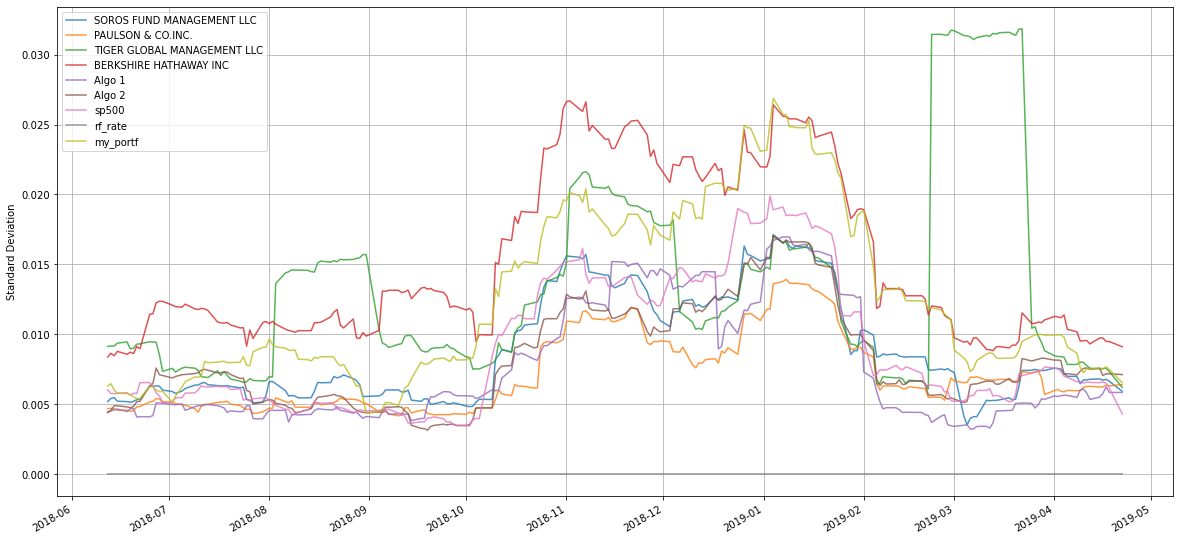

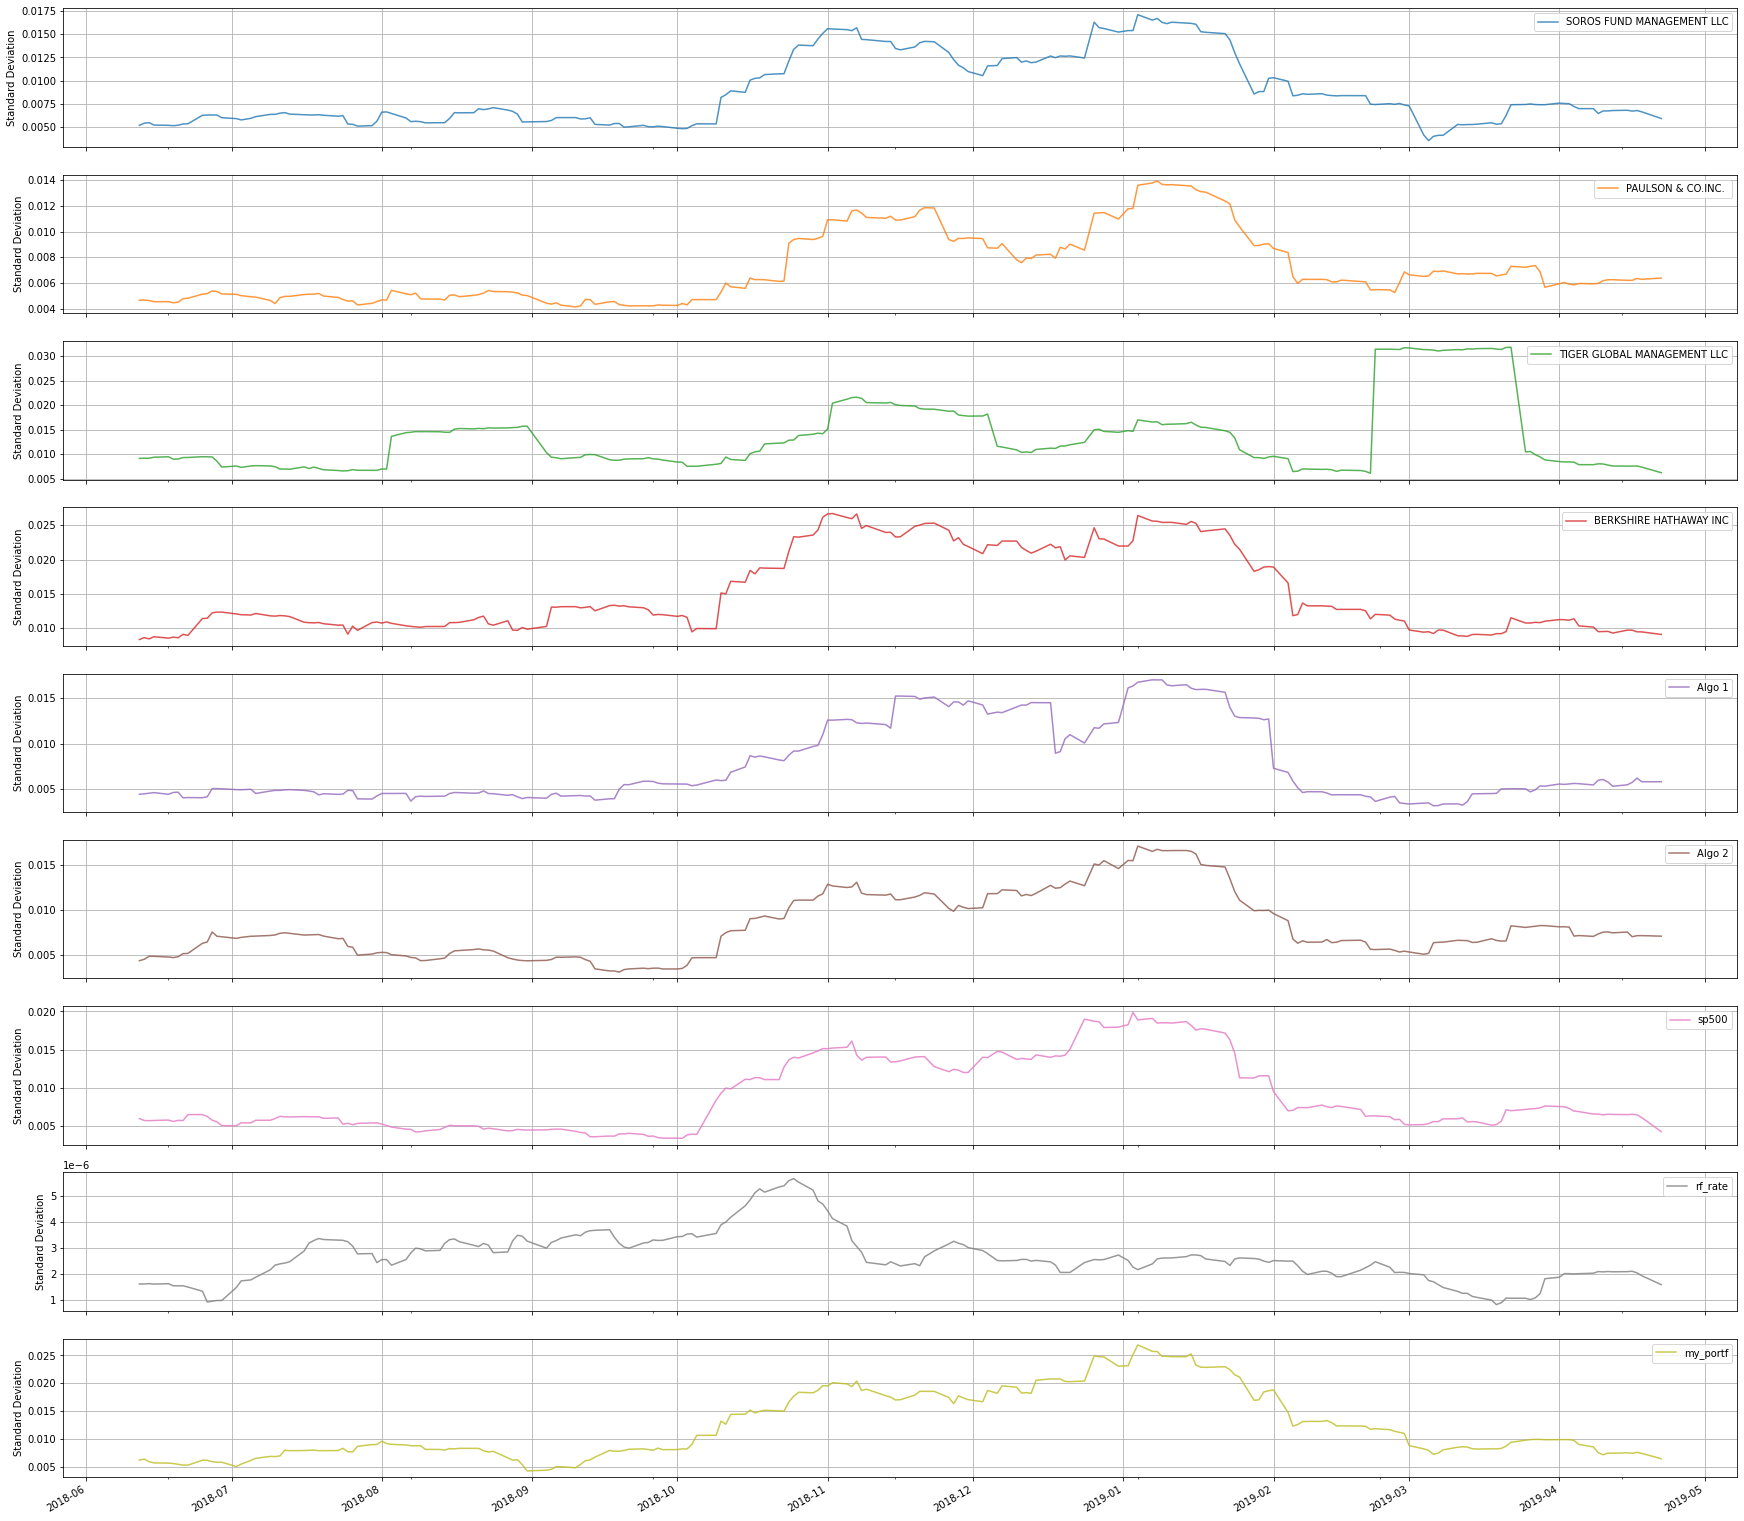

In [39]:
# Calculate rolling standard deviation
portf_rolling_std = portf_ret3.rolling(21).std()

# Plot rolling standard deviation

## Plot all together
portf_rolling_std.plot(figsize = (20,10), ylabel = 'Standard Deviation',legend = True, grid = True, alpha = 0.8)

## Plot them separately
portf_rolling_std.plot(subplots=True, figsize = (30,30), ylabel = 'Standard Deviation',legend = True, grid = True, alpha = 0.8)

### Calculate and plot the correlation

In [40]:
# Calculate and plot the correlation
correlation = portf_ret3.corr()

# Display the correlation matrix
correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.790311   
PAULSON & CO.INC.                             0.790311            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.479668            0.484989   
BERKSHIRE HATHAWAY INC                        0.814510            0.647792   
Algo 1                                        0.345873            0.366657   
Algo 2                                        0.860597            0.782493   
sp500                                        -0.026662           -0.058986   
rf_rate                                       0.033061           -0.044253   
my_portf                                      0.728195            0.640770   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.479668   
PAULSON & CO.INC.                               0.484989   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.325265   
Algo 1                                          0.118915   
Algo 2                                          0.410782   
sp500                                           0.005646   
rf_rate                                        -0.069115   
my_portf                                        0.389025   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.814510  0.345873  0.860597   
PAULSON & CO.INC.                          0.647792  0.366657  0.782493   
TIGER GLOBAL MANAGEMENT LLC                0.325265  0.118915  0.410782   
BERKSHIRE HATHAWAY INC                     1.000000  0.331191  0.779680   
Algo 1                                     0.331191  1.000000  0.371771   
Algo 2                                     0.779680  0.371771  1.000000   
sp500                                     -0.037539 -0.054709 -0.040992   
rf_rate                                    0.065732  0.067101  0.015233   
my_portf                                   0.800519  0.271940  0.736578   

                                sp500   rf_rate  my_portf  
SOROS FUND MANAGEMENT LLC   -0.026662  0.033061  0.728195  
PAULSON & CO.INC.           -0.058986 -0.044253  0.640770  
TIGER GLOBAL MANAGEMENT LLC  0.005646 -0.069115  0.389025  
BERKSHIRE HATHAWAY INC      -0.037539  0.065732  0.800519  
Algo 1                      -0.054709  0.067101  0.271940  
Algo 2                      -0.040992  0.015233  0.736578  
sp500                        1.000000 -0.008400  0.007264  
rf_rate                     -0.008400  1.000000 -0.014351  
my_portf                     0.007264 -0.014351  1.000000

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My_Portfolio'}>

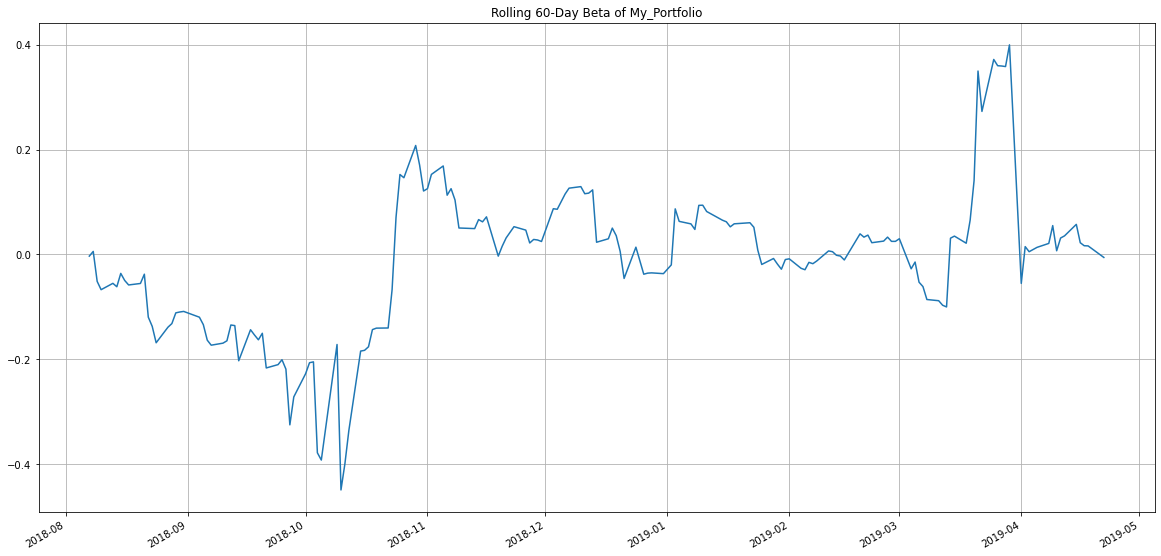

In [41]:
# Calculate and plot Beta

# Calculate covariance of a single portfolio
rolling_cov = portf_ret3['my_portf'].rolling(window = 60).cov(portf_ret3['sp500'])

# Calculate variance of S&P 500
rolling_var = portf_ret3['sp500'].rolling(window = 60).var()

# Computing beta
rolling_beta = rolling_cov / rolling_var

# Plot beta trend
rolling_beta.plot(figsize = (20,10), grid = True, title = 'Rolling 60-Day Beta of My_Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = ((portf_ret3.mean()-portf_ret3['rf_rate'].mean()) * 252) / (portf_ret3.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.121374
PAULSON & CO.INC.             -0.202804
TIGER GLOBAL MANAGEMENT LLC   -1.354220
BERKSHIRE HATHAWAY INC        -0.016364
Algo 1                         1.528714
Algo 2                        -0.271243
sp500                         -0.852531
rf_rate                        0.000000
my_portf                       0.726841
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

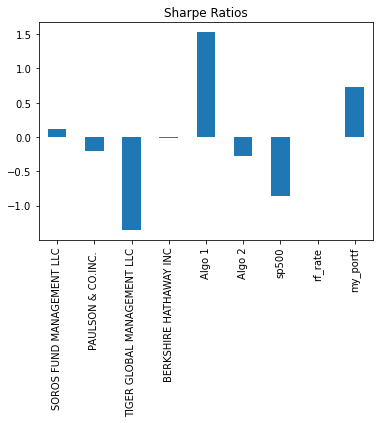

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = 'Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [44]:
print("My_Portfolio outperforms both the S&P 500 and the whales portfolios but not Algo 1 in terms of sharpe ratios.")

My_Portfolio outperforms both the S&P 500 and the whales portfolios but not Algo 1 in terms of sharpe ratios.
